<a href="https://colab.research.google.com/github/MartinO32/PP1_grupo23/blob/google_colab/Estandarizado_de_pp1_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correr primero esta celda, y las celdas 2, 3 y 4 no correrlas.

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#tablas a importar
tablas = {'tinto':'https://drive.google.com/uc?id=1g7yjnBcDKV41VHfiKFrT4PK1tWNcQIeE',
          'blanco':'https://drive.google.com/uc?id=1_M9b5on3OkszHQQAtP2LCD3AjM7BIkvv'}

archivos = []

#Importar los archivos CSV y guardarlos en una lista
for t in tablas.values():
    datos = pd.read_csv(t,
                        sep = ';',
                        encoding='latin-1',
                        low_memory=False)
    archivos.append(datos)

#Desempaquetado de archivos importados
vino_tinto,vino_blanco = archivos[:2]
df_vinos= pd.concat([vino_blanco, vino_tinto], axis=0, ignore_index=True)  # Concatenación por filas


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns



```
# Tiene formato de código
```

## Limpieza / EDA


In [231]:
print(f"Cantidad de dumplicados en el dataframe: {df_vinos.duplicated().sum()}")

Cantidad de dumplicados en el dataframe: 1179


In [232]:
df_vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Verifico la distribucion de las variables respecto de la variable target "quality", para determinar el tratamiento de los outliers.

> Bloque con sangría



In [233]:
df_vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [234]:
cantidad_por_calidad = df_vinos['quality'].value_counts()
cantidad_por_calidad

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

El siguiente grafico no es necesario

array([[<Axes: title={'center': 'quality'}>]], dtype=object)

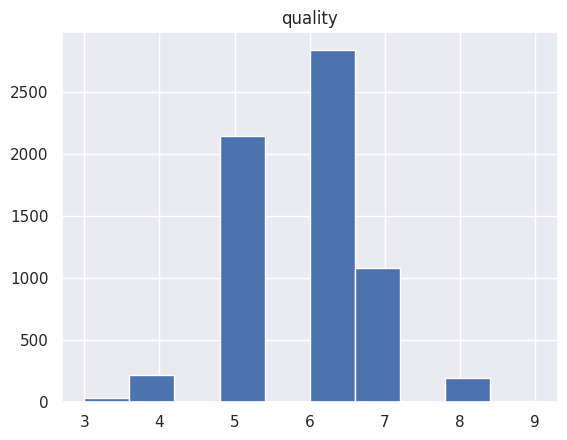

In [235]:
df_vinos.hist("quality")

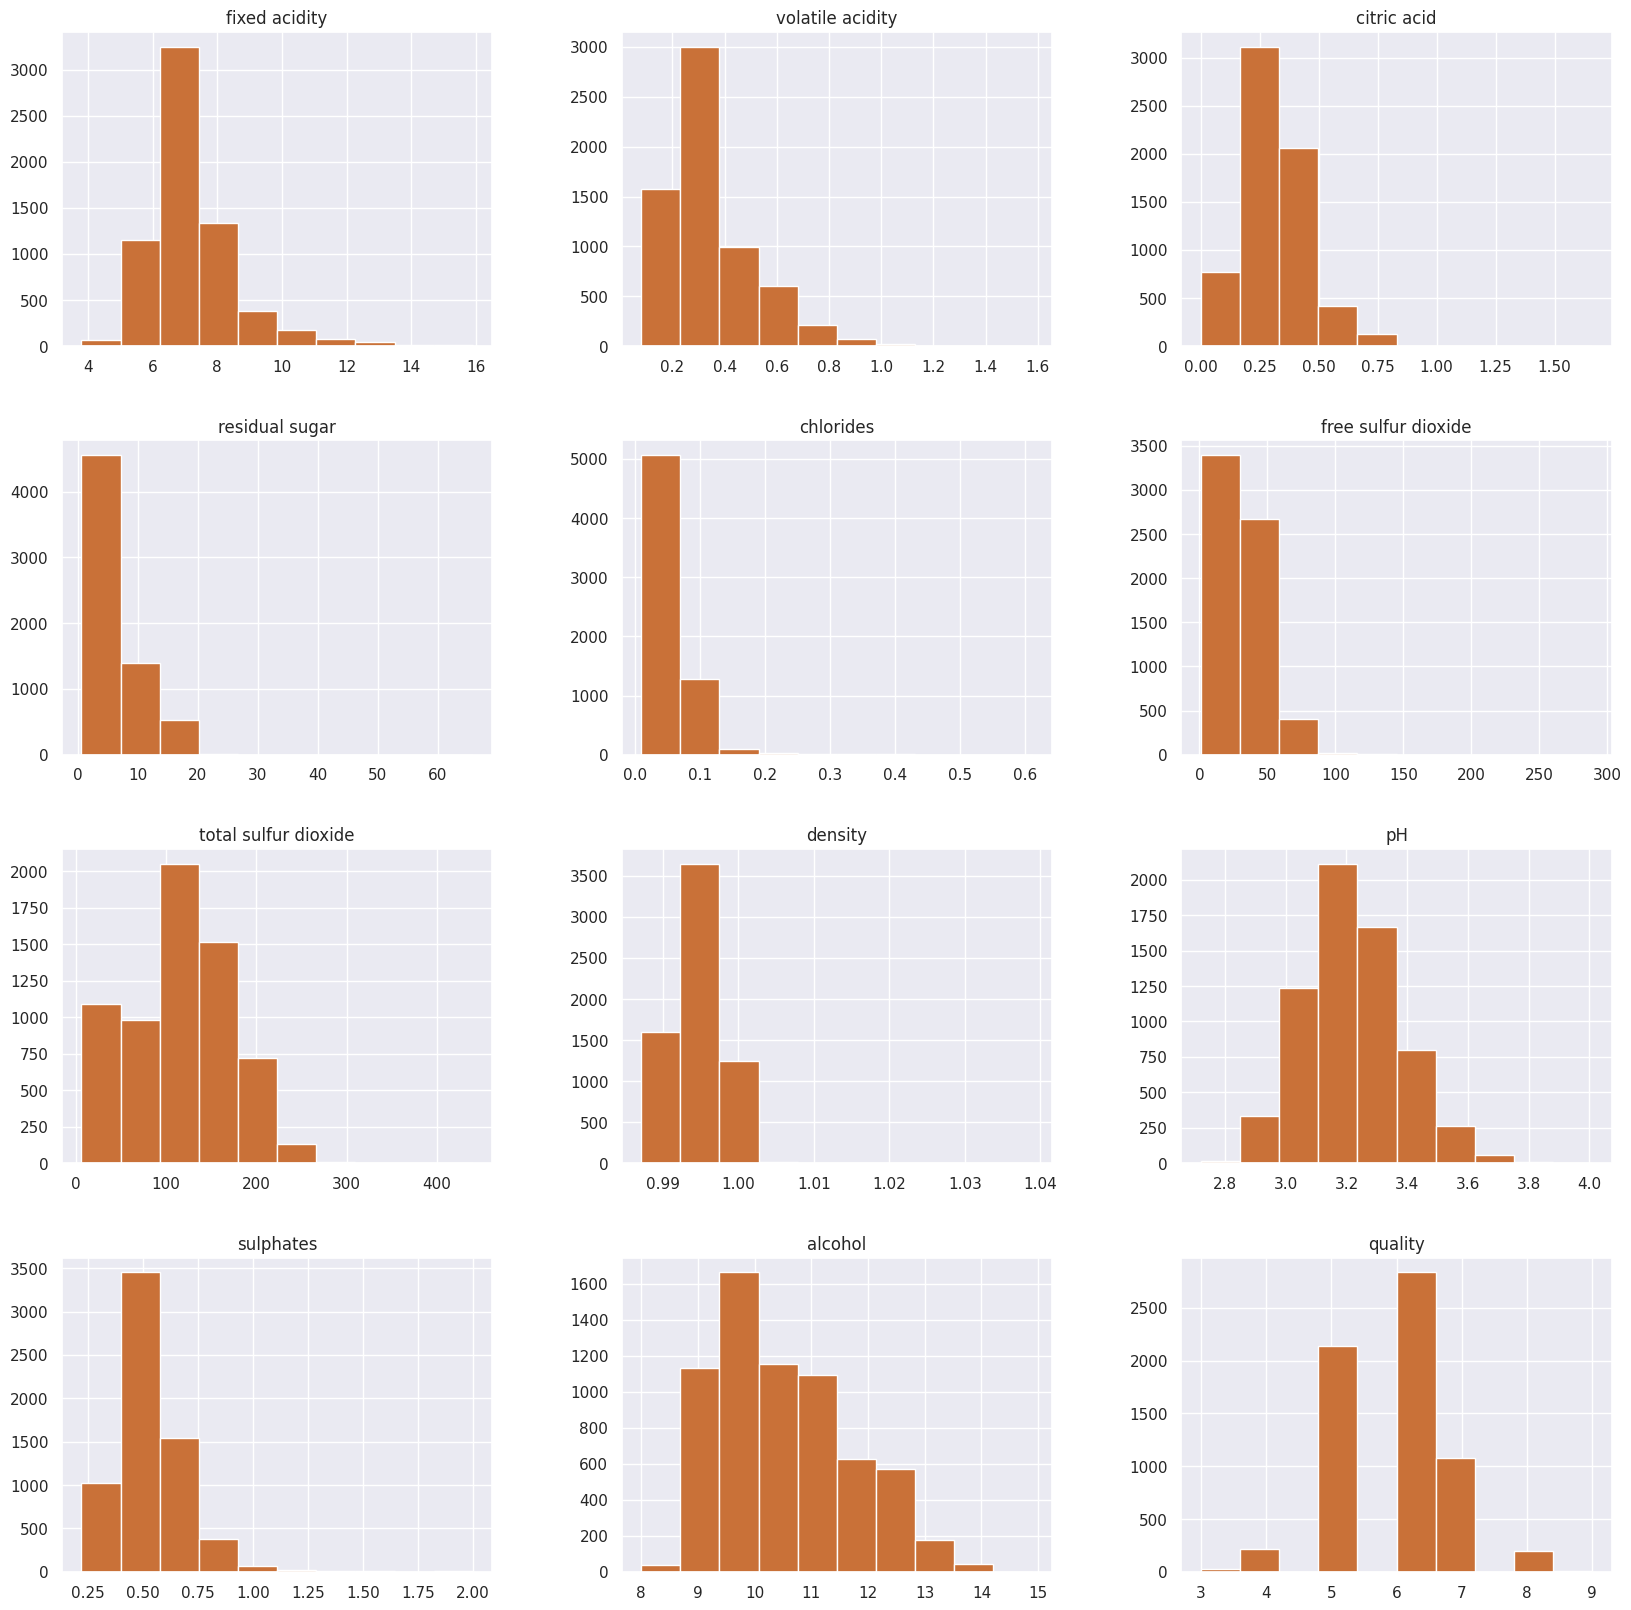

In [236]:
df_vinos.hist(figsize=(20,20), color='#C97138')
plt.show()

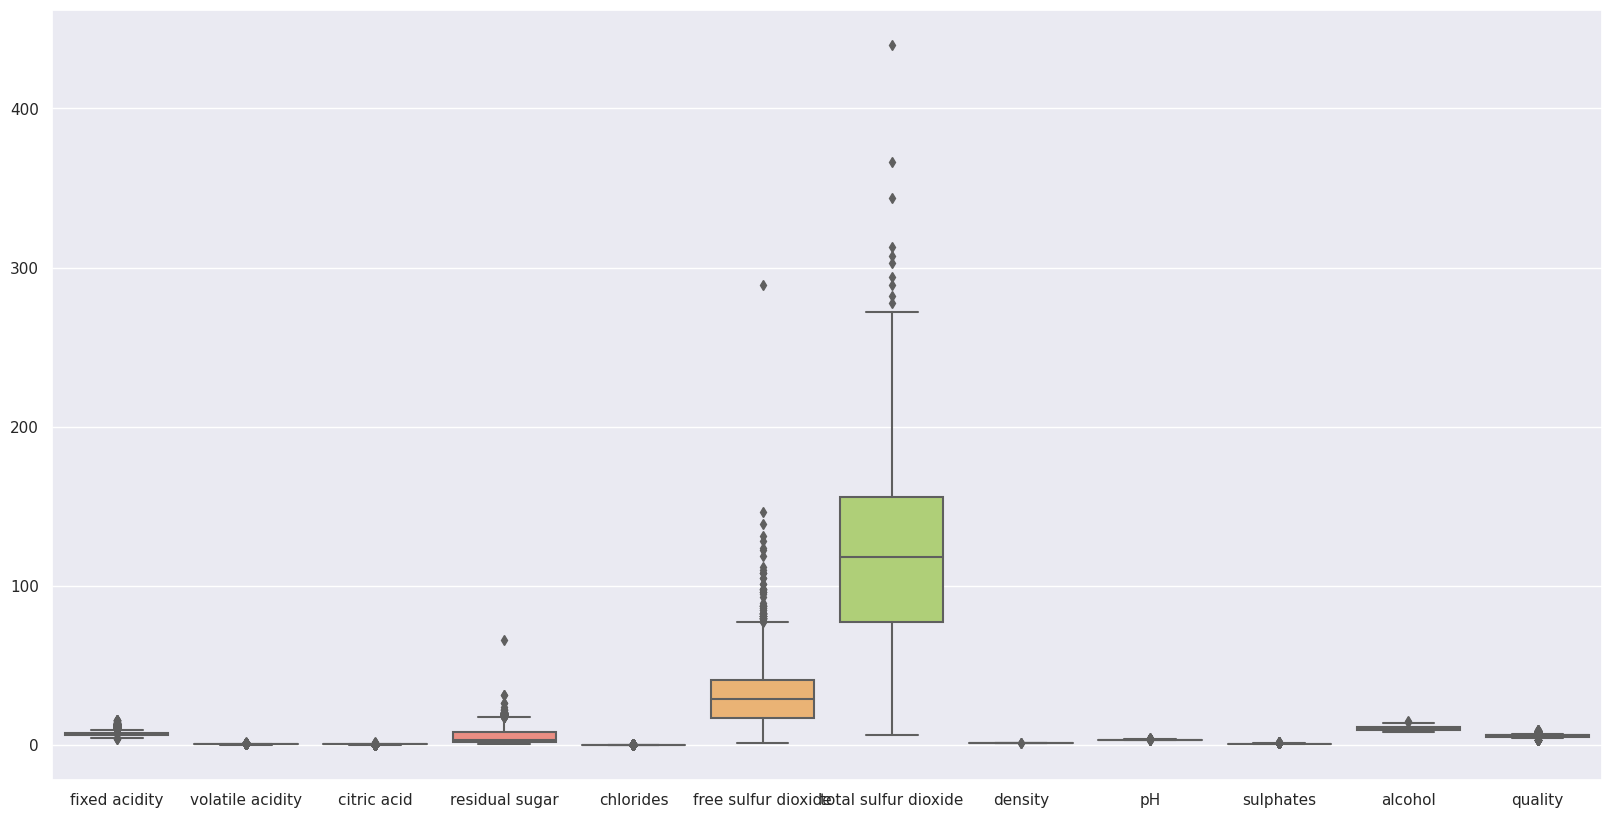

In [237]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df_vinos,palette="Set3")
plt.show()

Del grafico anterior se desprende que debamos darle tratamiento a los outliers

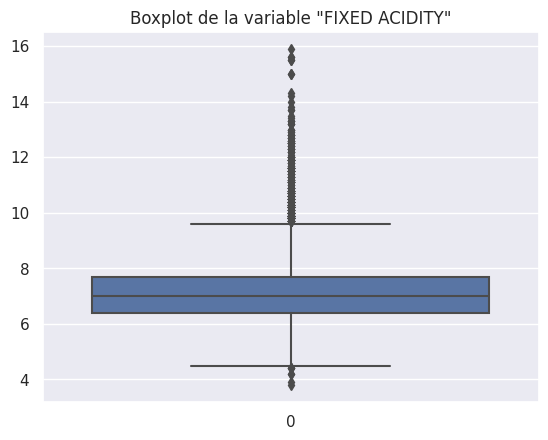

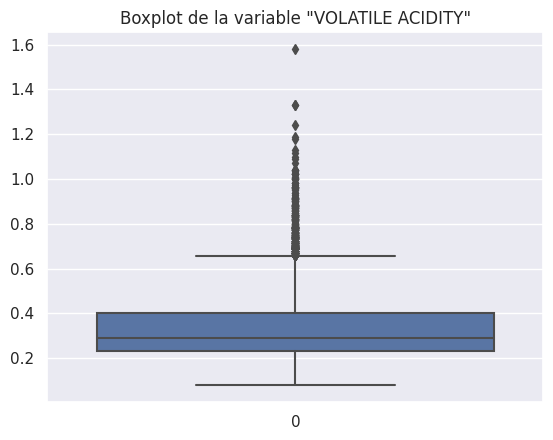

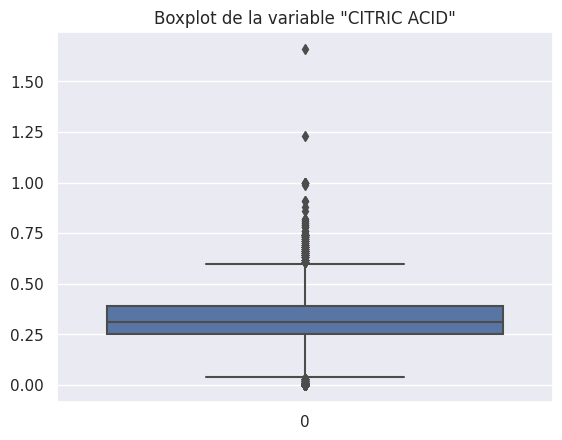

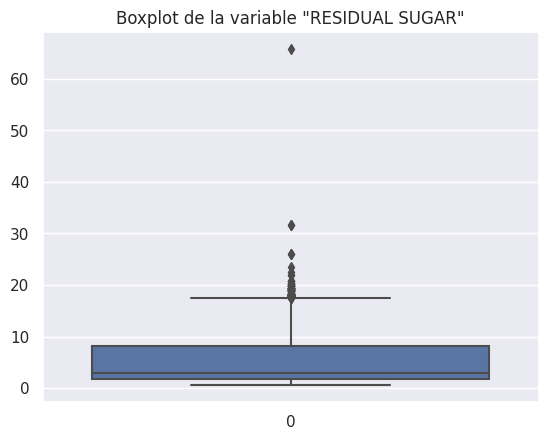

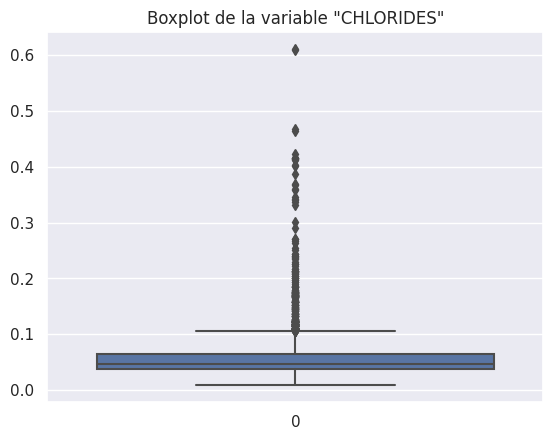

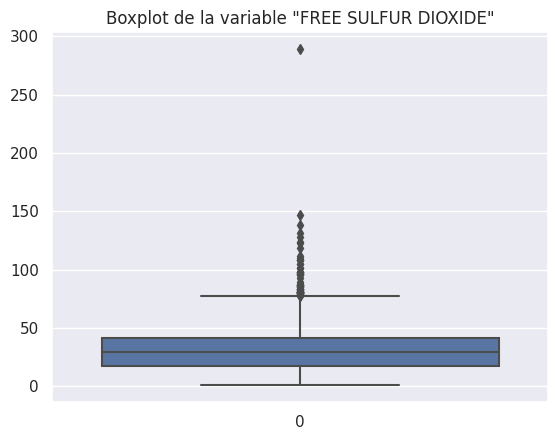

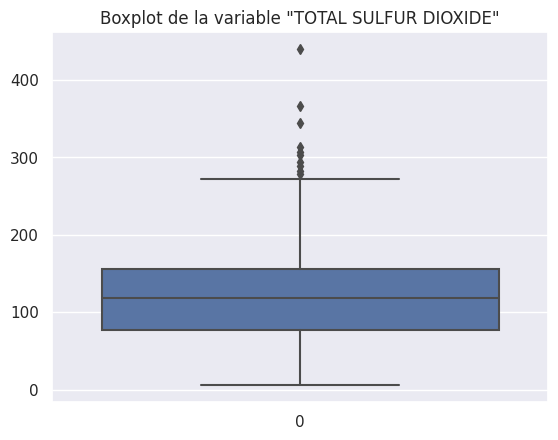

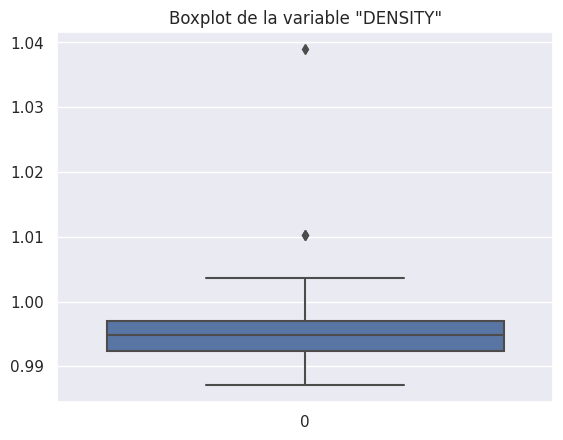

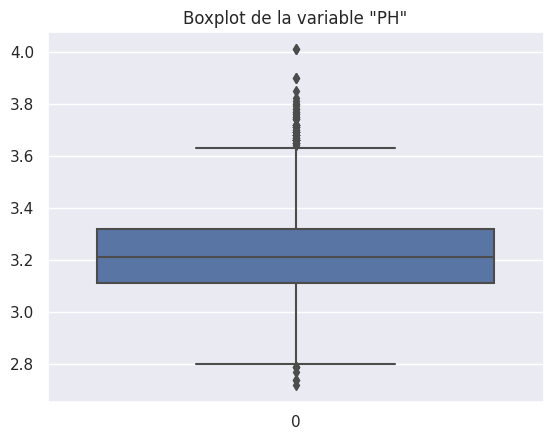

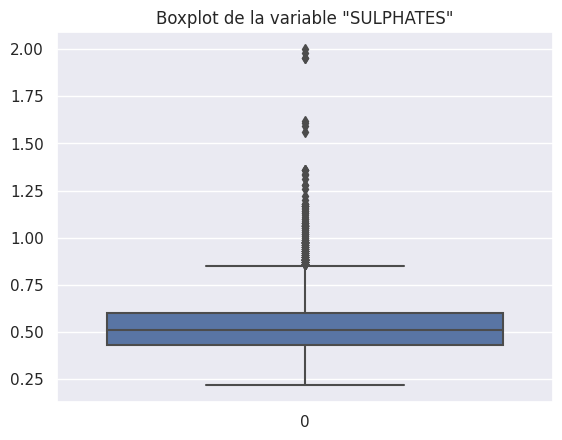

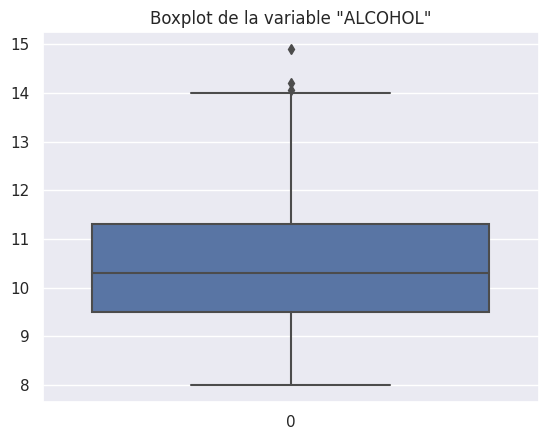

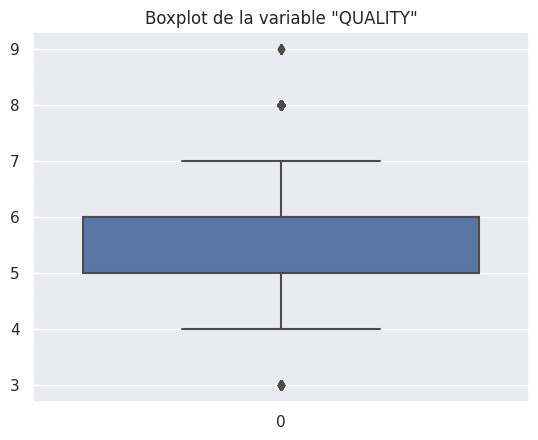

In [238]:

columnas = df_vinos.columns.values
for i, col in enumerate(columnas):
    box = sns.boxplot(data=df_vinos[col])
    box.set_title(f'Boxplot de la variable "{columnas[i].upper()}"')
    plt.show()

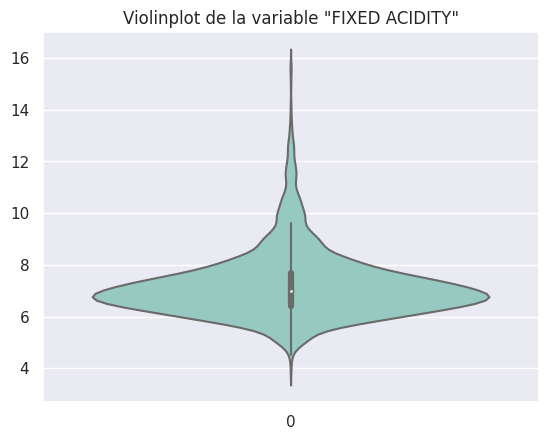

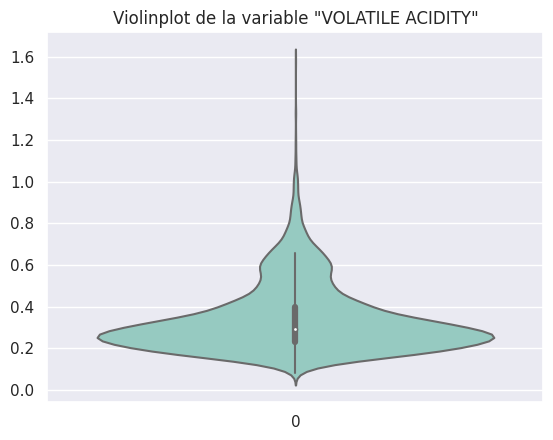

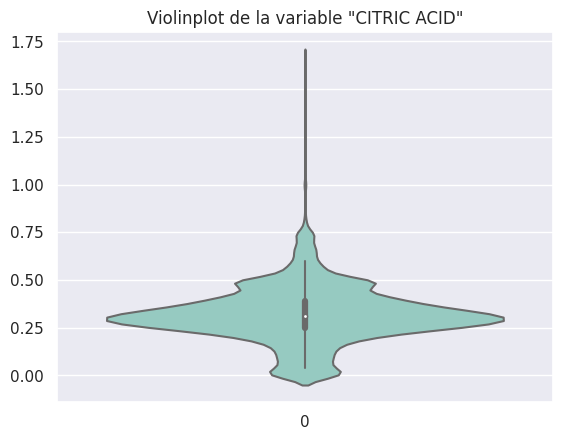

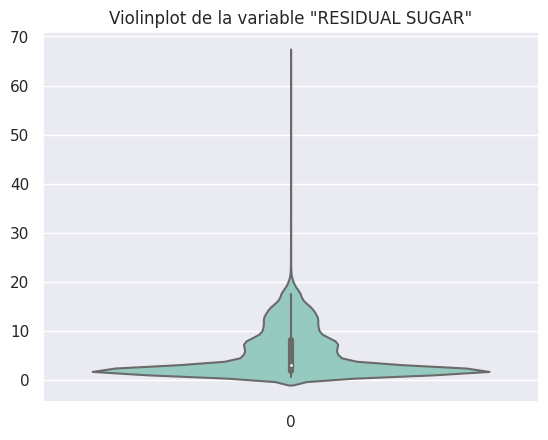

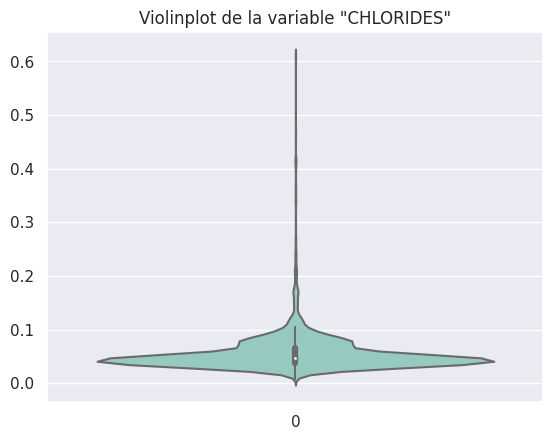

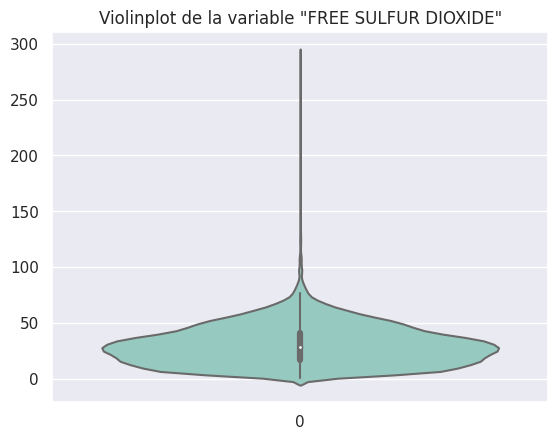

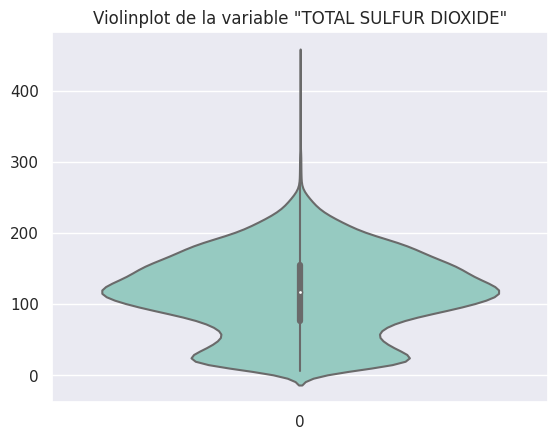

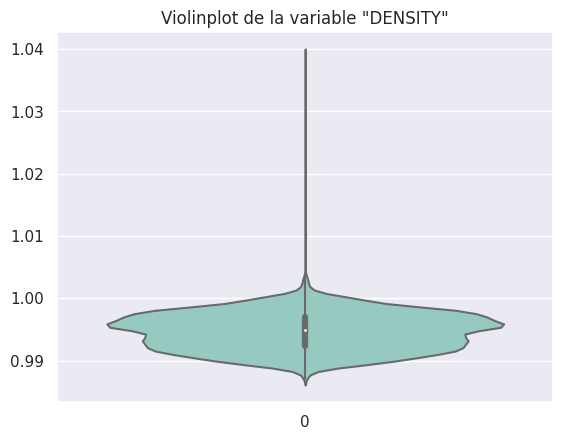

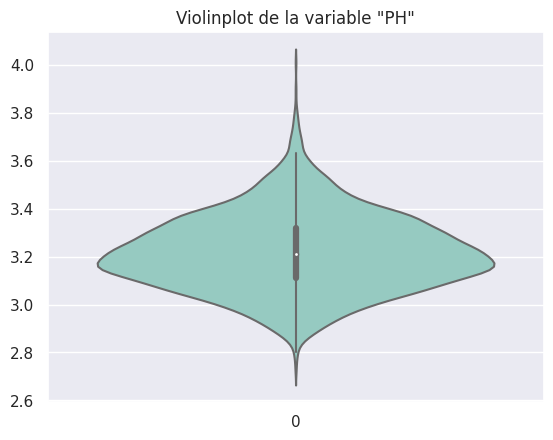

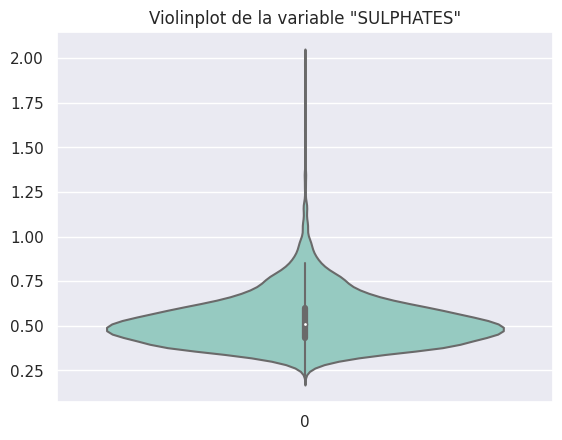

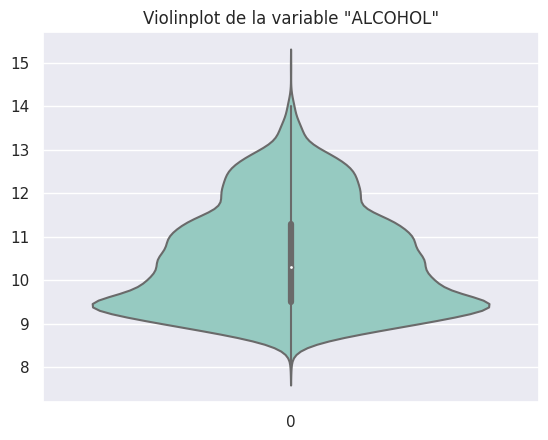

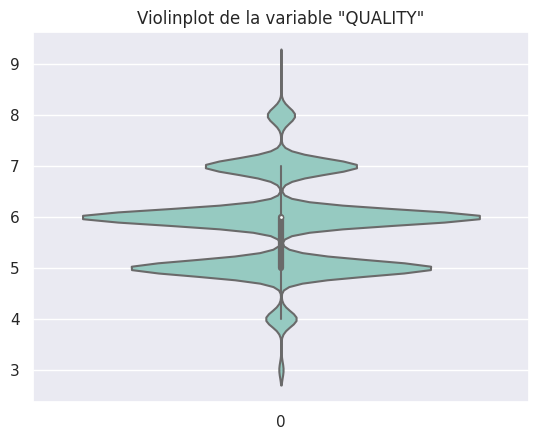

In [239]:

for i, col in enumerate(columnas):
    violin = sns.violinplot(data=df_vinos[col],palette="Set3")
    violin.set_title(f'Violinplot de la variable "{columnas[i].upper()}"')
    plt.show()



Trabajamos los outliers siguendo el metodo de las 3 desvaciones estandar (por ser las distribuciones de las variables muy cercanas a distribuciones normales)

In [240]:
columnas_con_outliers = ['residual sugar', 'total sulfur dioxide', "free sulfur dioxide" ]

for i, col in enumerate(columnas_con_outliers):
    if i != len(columnas)-1:
        df_vinos_long = df_vinos
        lower_limit = df_vinos[col].mean() - 3*df_vinos[col].std()
        upper_limit = df_vinos[col].mean() + 3*df_vinos[col].std()

        #print("lower ", lower_limit, "upper", upper_limit, col)

        df_vinos = df_vinos_long[(df_vinos_long[col] > lower_limit) & (df_vinos_long[col] < upper_limit)]
        print(df_vinos_long.shape[0] - df_vinos.shape[0]) #muestro la diferencia entre los 2 DF



26
8
38


In [241]:
columnas

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [242]:
'''promedios = {}
for col in columnas:
  promedios.update({col: df_vinos[col].mean()})'''

'promedios = {}\nfor col in columnas:\n  promedios.update({col: df_vinos[col].mean()})'

In [243]:
'''means'''

'means'

### Estandarizado

In [244]:

xt = df_vinos.drop(["quality"], axis=True)
yt = df_vinos["quality"]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transformado = scaler.fit_transform(xt, yt)
transformado

array([[-0.70744831, -0.24389985,  0.14864214, ...,  0.50289368,
        -0.27974427, -0.83615679],
       [ 0.67754491, -0.365114  ,  0.56243145, ...,  0.25392682,
        -0.61559841, -0.33278848],
       [-0.0149517 , -0.66814937,  0.01071237, ..., -0.18176518,
        -0.88428171, -0.50057791],
       ...,
       [-0.70744831,  1.02884872, -1.29962047, ...,  1.24979426,
         1.46669721,  0.42226399],
       [-1.01522458,  1.84704423, -1.36858535, ...,  2.18341999,
         1.1980139 , -0.24889376],
       [-0.93828051, -0.18329277,  1.04518566, ...,  1.06306912,
         0.86215977,  0.42226399]])

In [245]:
yt.describe()

count    6425.000000
mean        5.821167
std         0.870286
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [246]:
xt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000
mean,7.219432,0.340243,0.318447,5.358926,0.056115,30.000156,114.833463,0.994667,3.219203,0.531647,10.496674
std,1.299747,0.165010,0.145013,4.586824,0.035186,16.559971,55.786537,0.002923,0.160676,0.148886,1.192063
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992320,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,2.950000,0.047000,29.000000,118.000000,0.994860,3.210000,0.510000,10.300000
75%,7.700000,0.410000,0.390000,8.000000,0.065000,41.000000,155.000000,0.996920,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,19.600000,0.611000,82.000000,282.000000,1.003690,4.010000,2.000000,14.900000


In [247]:
yt.reset_index(drop=True, inplace=True)

In [248]:
yt

0       6
1       6
2       6
3       6
4       6
       ..
6420    5
6421    6
6422    6
6423    5
6424    6
Name: quality, Length: 6425, dtype: int64

In [249]:
df_transformado = pd.DataFrame(transformado, columns=xt.columns)

In [250]:
df_transformado

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.707448,-0.243900,0.148642,-0.819569,-0.202224,-0.966270,0.307742,-0.228058,0.502894,-0.279744,-0.836157
1,0.677545,-0.365114,0.562431,0.336005,-0.173802,-0.000009,-0.319698,0.148317,0.253927,-0.615598,-0.332788
2,-0.014952,-0.668149,0.010712,0.684857,0.053581,1.026642,1.275793,0.319397,-0.181765,-0.884282,-0.500578
3,-0.014952,-0.668149,0.010712,0.684857,0.053581,1.026642,1.275793,0.319397,-0.181765,-0.884282,-0.500578
4,0.677545,-0.365114,0.562431,0.336005,-0.173802,-0.000009,-0.319698,0.148317,0.253927,-0.615598,-0.332788
...,...,...,...,...,...,...,...,...,...,...,...
6420,-0.784392,1.574312,-1.644445,-0.732356,0.963111,0.120773,-1.269822,0.079885,1.436519,0.324793,0.002790
6421,-1.015225,1.271277,-1.506515,-0.688749,0.167272,0.543512,-1.144334,0.155160,1.872211,1.533868,0.590053
6422,-0.707448,1.028849,-1.299620,-0.666946,0.565191,-0.060401,-1.341530,0.367299,1.249794,1.466697,0.422264
6423,-1.015225,1.847044,-1.368585,-0.732356,0.536769,0.120773,-1.269822,0.274916,2.183420,1.198014,-0.248894


In [251]:
df_transformado.insert(len(df_transformado.columns), 'quality', yt)

In [252]:
df_transformado


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.707448,-0.243900,0.148642,-0.819569,-0.202224,-0.966270,0.307742,-0.228058,0.502894,-0.279744,-0.836157,6
1,0.677545,-0.365114,0.562431,0.336005,-0.173802,-0.000009,-0.319698,0.148317,0.253927,-0.615598,-0.332788,6
2,-0.014952,-0.668149,0.010712,0.684857,0.053581,1.026642,1.275793,0.319397,-0.181765,-0.884282,-0.500578,6
3,-0.014952,-0.668149,0.010712,0.684857,0.053581,1.026642,1.275793,0.319397,-0.181765,-0.884282,-0.500578,6
4,0.677545,-0.365114,0.562431,0.336005,-0.173802,-0.000009,-0.319698,0.148317,0.253927,-0.615598,-0.332788,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6420,-0.784392,1.574312,-1.644445,-0.732356,0.963111,0.120773,-1.269822,0.079885,1.436519,0.324793,0.002790,5
6421,-1.015225,1.271277,-1.506515,-0.688749,0.167272,0.543512,-1.144334,0.155160,1.872211,1.533868,0.590053,6
6422,-0.707448,1.028849,-1.299620,-0.666946,0.565191,-0.060401,-1.341530,0.367299,1.249794,1.466697,0.422264,6
6423,-1.015225,1.847044,-1.368585,-0.732356,0.536769,0.120773,-1.269822,0.274916,2.183420,1.198014,-0.248894,5


### Mapeo de variable quality

#### Mapeo

In [253]:
quality_mapping = { 3 : "Low",4 : "Low",5: "Medium",6 : "Medium",7: "Medium",8 : "High",9 : "High"}


In [254]:
df_transformado['quality'] = df_transformado['quality'].map(quality_mapping)


In [255]:
df_transformado.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.425000e+03,6.425000e+03,6.425000e+03,6.425000e+03,6.425000e+03,6.425000e+03,6.425000e+03,6.425000e+03,6.425000e+03,6.425000e+03,6.425000e+03
mean,-7.254724e-16,-2.477223e-16,1.946389e-16,8.847225e-17,-7.077780e-17,-7.077780e-17,1.061667e-16,-1.362473e-15,-4.689029e-16,-2.123334e-16,-1.061667e-15
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-2.631050e+00,-1.577255e+00,-2.196164e+00,-1.037602e+00,-1.339137e+00,-1.751356e+00,-1.951043e+00,-2.585538e+00,-3.107126e+00,-2.093357e+00,-2.094578e+00
25%,-6.305042e-01,-6.681494e-01,-4.720418e-01,-7.759624e-01,-5.148753e-01,-7.850960e-01,-6.782355e-01,-8.028865e-01,-6.796989e-01,-6.827692e-01,-8.361568e-01
50%,-1.688398e-01,-3.045069e-01,-5.825252e-02,-5.252247e-01,-2.590700e-01,-6.040068e-02,5.676609e-02,6.619897e-02,-5.728175e-02,-1.454026e-01,-1.649990e-01
75%,3.697686e-01,4.227780e-01,4.934666e-01,5.758406e-01,2.525405e-01,6.642947e-01,7.200602e-01,7.710478e-01,6.273771e-01,4.591348e-01,6.739481e-01
max,6.679182e+00,7.513806e+00,9.252007e+00,3.105020e+00,1.577139e+01,3.140337e+00,2.996772e+00,3.087469e+00,4.922055e+00,9.863050e+00,3.694158e+00


In [256]:
df_transformado

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.707448,-0.243900,0.148642,-0.819569,-0.202224,-0.966270,0.307742,-0.228058,0.502894,-0.279744,-0.836157,Medium
1,0.677545,-0.365114,0.562431,0.336005,-0.173802,-0.000009,-0.319698,0.148317,0.253927,-0.615598,-0.332788,Medium
2,-0.014952,-0.668149,0.010712,0.684857,0.053581,1.026642,1.275793,0.319397,-0.181765,-0.884282,-0.500578,Medium
3,-0.014952,-0.668149,0.010712,0.684857,0.053581,1.026642,1.275793,0.319397,-0.181765,-0.884282,-0.500578,Medium
4,0.677545,-0.365114,0.562431,0.336005,-0.173802,-0.000009,-0.319698,0.148317,0.253927,-0.615598,-0.332788,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
6420,-0.784392,1.574312,-1.644445,-0.732356,0.963111,0.120773,-1.269822,0.079885,1.436519,0.324793,0.002790,Medium
6421,-1.015225,1.271277,-1.506515,-0.688749,0.167272,0.543512,-1.144334,0.155160,1.872211,1.533868,0.590053,Medium
6422,-0.707448,1.028849,-1.299620,-0.666946,0.565191,-0.060401,-1.341530,0.367299,1.249794,1.466697,0.422264,Medium
6423,-1.015225,1.847044,-1.368585,-0.732356,0.536769,0.120773,-1.269822,0.274916,2.183420,1.198014,-0.248894,Medium


In [257]:
df_transformado.isnull().values.any()

False

In [258]:
df_transformado.isna().values.any()

False

#### Remapeo

In [259]:
mapping_quality = {"Low" : 0,"Medium": 1,"High" : 2}
df_transformado["quality"] =  df_transformado["quality"].map(mapping_quality)

In [260]:
correlaciones = df_transformado.corr()
print(correlaciones)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.217735     0.325307   
volatile acidity           0.217735          1.000000    -0.383607   
citric acid                0.325307         -0.383607     1.000000   
residual sugar            -0.116696         -0.209495     0.141237   
chlorides                  0.298687          0.377609     0.039716   
free sulfur dioxide       -0.292271         -0.364375     0.150792   
total sulfur dioxide      -0.334075         -0.419038     0.197140   
density                    0.472388          0.272512     0.094580   
pH                        -0.252836          0.262467    -0.331755   
sulphates                  0.302414          0.227344     0.055999   
alcohol                   -0.097520         -0.040427    -0.014985   
quality                   -0.047498         -0.145214     0.056584   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

En la siguiente celda selecciono las variables que tienen correlacion alta para poder determinar si a alguna de ellas debo dejarlas fuera del dataset por no ser independientes entre ellas. NO es necesario, si analizamos la matriz de correlaciones vemos que las variables que no son **LI** son **alcohol/densidad** y las dos de **dioxido de azufre**

In [261]:
# Recorro la matriz de correlaciones buscando los valores absolutos mayores a 0.7
corr = {}
for i in range(len(correlaciones)):
    a = columnas[i]
    for j in range(len(correlaciones)):
        b = columnas[j]
        corr_a_b = df_transformado[a].corr(df_transformado[b])
        #print(corr_a_b, a, b)
        if abs(corr_a_b) >= 0.7 and a != b:
            print(a, b, corr_a_b)



free sulfur dioxide total sulfur dioxide 0.7288310078881391
total sulfur dioxide free sulfur dioxide 0.7288310078881391
density alcohol -0.703243426248948
alcohol density -0.703243426248948


Una de las siguietens variables o features puede ser eliminada

free sulfur dioxide

total sulfur dioxide

alcohol

density


Supongamos se elimina _**total sulfur dioxide**_ y _**alcohol**_


In [262]:
df_transf_sin_ld = df_transformado.drop(columns=["total sulfur dioxide", "alcohol"])

En este punto ya tenemos el dataset sin duplicados, sin outliers y sin variables LD.



```
# Tiene formato de código
```

# Modelos

## Division del dataframe en features y target (x e y)

In [277]:
data = df_transf_sin_ld
x = data.drop(["quality"], axis=True)
y = data["quality"]

In [278]:
data.quality.value_counts()

1    5992
0     239
2     194
Name: quality, dtype: int64

In [279]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [280]:
print(model.feature_importances_)


[0.10116248 0.12251579 0.10327681 0.11830492 0.10599278 0.11531458
 0.11429978 0.10413693 0.11499591]


<Axes: >

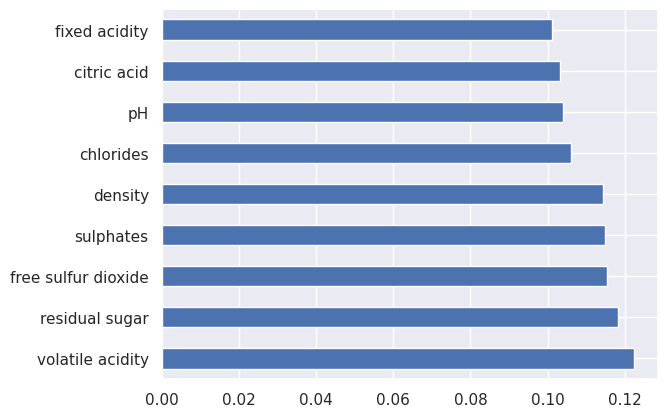

In [281]:
feat_importances = pd.Series(model.feature_importances_, index= x.columns)
feat_importances.nlargest(9).plot(kind='barh')

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [283]:
model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [0.5,10,20],
            'kernel':["rbf"]
        }
    },

    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },

    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[1,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },

    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [0.5,5,10]
        }
    }

}

In [284]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=True)
    clf.fit(x,y)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [285]:
data_score = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [286]:
data_score

,Model,Best_Score,Best_Params
0,svm,0.932607,"{'C': 0.5, 'kernel': 'rbf'}"
1,decision_tree,0.921244,"{'criterion': 'entropy', 'max_depth': 5}"
2,random_forest,0.932607,"{'max_depth': 1, 'n_estimators': 1}"
3,naive_bayes,0.842788,{}
4,logistic_regression,0.932451,{'C': 0.5}


In [287]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [288]:
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates
count,4497.000000,4497.000000,4497.000000,4497.000000,4497.000000,4497.000000,4497.000000,4497.000000,4497.000000
mean,-0.011889,0.006790,-0.009838,0.004071,0.007391,0.010559,0.004364,0.013901,-0.007700
std,0.988069,1.006899,0.999946,0.995263,1.009659,1.003353,0.989684,1.004848,0.979089
min,-2.631050,-1.577255,-2.196164,-1.037602,-1.253868,-1.751356,-2.585538,-3.107126,-2.026186
25%,-0.630504,-0.668149,-0.541007,-0.775962,-0.514875,-0.785096,-0.782357,-0.679699,-0.682769
50%,-0.168840,-0.243900,-0.058253,-0.514323,-0.259070,-0.060401,0.073042,-0.057282,-0.145403
75%,0.292825,0.422778,0.493467,0.597644,0.280963,0.664295,0.764205,0.689619,0.459135
max,6.448350,5.998629,4.700325,3.105020,15.771392,3.140337,3.087469,4.922055,9.728709


In [289]:
x_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates
count,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000
mean,0.027731,-0.015837,0.022946,-0.009495,-0.017240,-0.024629,-0.010180,-0.032424,0.017960
std,1.027269,0.984062,1.000269,1.011414,0.977407,0.992219,1.024099,0.988362,1.047441
min,-2.554106,-1.546952,-2.196164,-1.015798,-1.339137,-1.751356,-2.547901,-2.982642,-2.093357
25%,-0.630504,-0.668149,-0.472042,-0.775962,-0.543298,-0.785096,-0.838813,-0.741941,-0.682769
50%,-0.168840,-0.304507,-0.058253,-0.557930,-0.259070,-0.090596,0.047380,-0.057282,-0.145403
75%,0.369769,0.362171,0.493467,0.554037,0.224118,0.664295,0.805264,0.565135,0.526306
max,6.679182,7.513806,9.252007,3.083217,15.742970,3.079946,2.902702,4.237397,9.863050


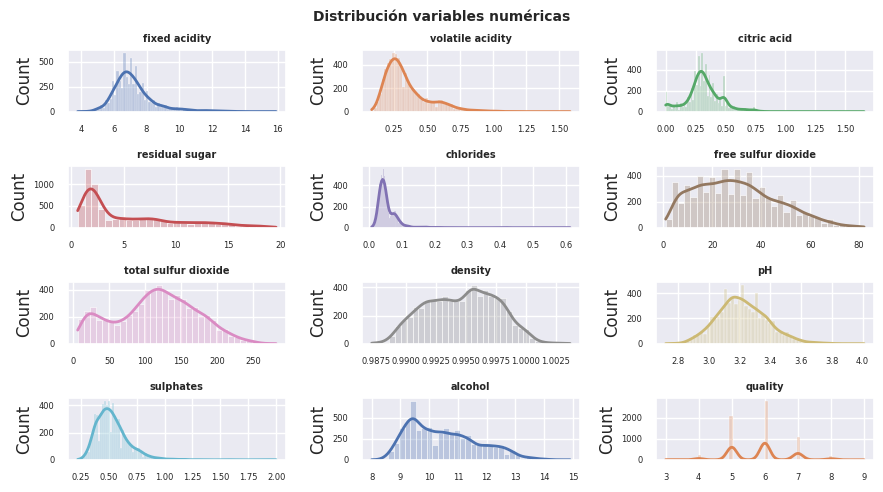

In [290]:

'''No correr, a menos que quieran ver las graficas'''

#Esto no es necesario, lo hice para probar como salian las graficas

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_vinos.select_dtypes(include=['float64', 'int']).columns
#columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df_vinos,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Ajustes de hiperparametros

Ahora vamos a ajustar los parametros del modelo de regresion logistica para intentar mejorar la certeza de la prediccion

In [291]:

model_params_regresion  = {
    'logistic_regression-liblinear' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto', max_iter=10000),
        'params': {
            "C" : [0.25, 0.5, 1, 5, 10]
        }
    },
    'logistic_regression-lbfgs' : {
        'model' : LogisticRegression(solver='lbfgs',multi_class = 'auto', max_iter=10000),
        'params': {
            "C" : [0.25, 0.5, 1, 5, 10]
        }
    },
    'logistic_regression-newton-cg' : {
        'model' : LogisticRegression(solver='newton-cg',multi_class = 'auto', max_iter=10000),
        'params': {
            "C" : [0.25, 0.5, 1, 5, 10]
        }
    },
    'logistic_regression-newton-cholesky' : {
        'model' : LogisticRegression(solver='newton-cholesky',multi_class = 'auto', max_iter=10000),
        'params': {
            "C" : [0.25, 0.5, 1, 5, 10]
        }
    }

}

score_new=[]
for model_name,mp in model_params_regresion.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=True)
    clf.fit(x,y)
    #print(mp["model"])
    score_new.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

df_vinos_score_new = pd.DataFrame(score_new,columns=["Model","Best_Score","Best_Params"])

df_vinos_score_new

,Model,Best_Score,Best_Params
0,logistic_regression-liblinear,0.932451,{'C': 0.25}
1,logistic_regression-lbfgs,0.932140,{'C': 0.25}
2,logistic_regression-newton-cg,0.932140,{'C': 0.25}
3,logistic_regression-newton-cholesky,0.932451,{'C': 0.25}


Con la ejecucion de la celda anterior obtengo el los paramentros que mejor se ajustan a nuestro modelo.

Las diferencias en la capacidad de cada modelo es minima, por lo que decidirse por uno u otro dependerá quizas de algun factor mas subjetivo.



# Entrenamiento del modelo

In [ ]:
modelo_regresion = LogisticRegression(solver='liblinear',multi_class = 'auto', max_iter=10000, C=0.5)
modelo_regresion.fit(x_train, y_train)
prediccion = modelo_regresion.predict(x_test)
print("Precision del modelo de regresion: {:.4f}".format(modelo_regresion.score(x_test, y_test)))

Presicion del modelo de regresion: 0.9305


In [ ]:
modelo_regresion = LogisticRegression(solver='liblinear',multi_class = 'auto', max_iter=10000, C=0.25)
modelo_regresion.fit(x_train, y_train)
prediccion = modelo_regresion.predict(x_test)
print("Precision del modelo de regresion: {:.4f}".format(modelo_regresion.score(x_test, y_test)))

Lo siguiente es comparar la aplicacion del mismo modelo con otra libreria.

# Notas aqui debajo

In [ ]:

#esto va despues de separar el df en test y train para calcular el error cuadratico medio y detrerminar si la prediccion es buena
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediccion)

from sklearn.metrics import mean_squared_error, r2_score
emc = mean_squared_error(y_test, prediccion)

# ver r2 = r2_score(y_test, y_pred)

In [ ]:
print("Accuracy: ", accuracy)

Accuracy:  0.9304979253112033


In [ ]:
#error medio cuadrado
emc

0.06950207468879668

In [ ]:
#coeficiente de determinacion

r2 = r2_score(y_test, prediccion)
r2

0.0027137094439402265

Si bien podemos ver que la distribucion de cauchy es a la que mejor responde el dataset, no es una distribucion que sirva para nuestro objetivo. Es por ello que se decide trabajar tomando al dataset como distribuido normalmente.
Esto es antes de hacer los mapeos de calidad a 3 categorias.
Ahora las distribuciones que mejor se ajustan al dataset son la ligistic y beta.
La distribucion beta  no es acorde a nuestro objetivo, mientras que la distribucion logistica, al igual que la normal, si responden a nuestro objetivo, por lo que los modelos a elegir para hacer el aprendizaje deberian ser los que corresponden a dichas distribuciones.

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        85
           1       0.93      1.00      0.96      1793
           2       0.00      0.00      0.00        50

    accuracy                           0.93      1928
   macro avg       0.64      0.34      0.33      1928
weighted avg       0.91      0.93      0.90      1928



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
prediccion

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from matplotlib.legend import Collection
import collections
print(collections.Counter(prediccion))
print(collections.Counter(y_test))

Counter({1: 1927, 0: 1})
Counter({1: 1793, 0: 85, 2: 50})


In [ ]:
from sklearn.metrics import confusion_matrix
#labels = ['0', '1', '2']
cm = confusion_matrix(y_test, prediccion, )
print(cm)

[[   1   84    0]
 [   0 1793    0]
 [   0   50    0]]
